In [1]:
from preprocessing import *
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import mne
from scipy.stats import ttest_ind, ttest_ind_from_stats
import matplotlib.gridspec as gridspec
tmin, tmax = -4, 4

In [2]:
def plot_tp(epochs,tmin, tmax, sub_no,alpha = 0.05):
    fig = plt.figure(figsize=[12, 20])
    fig.subplots_adjust(hspace=.7)
    gs = gridspec.GridSpec(len(epochs.ch_names), 2, figure=fig)
    data={}
    #step through the channel names, eg attention, delta, highAlpha...
    for i, ch_name in enumerate(epochs.ch_names):
        #a is bluffing at the specific channel name.
        #.T is used to rotate the array for the time series to be up front
        a=epochs['bluffing'].copy().pick_channels(ch_names=[ch_name])._data.T
        #b is not bluffing at the specific channel name.
        b=epochs['not_bluffing'].copy().pick_channels(ch_names=[ch_name])._data.T
        l=len(a)#number of time values we have basically its (tmax-tmin)*10
        t_values=[]
        p_values=[]
        #loop through all time values
        for t in range(l):
            #preform tests
            t, p = ttest_ind(a[t][0], b[t][0])
            t_values.append(t)
            p_values.append(p)
        #The data is saved in this dictionary for future use eg data['attention']['t_values']
        times = (np.arange(len(p_values))-(tmax*10))/10
        data[ch_name]={'t_values':t_values, 'p_values':p_values}
        #plot t values
        ax1=fig.add_subplot(gs[i, 0], label=ch_name)
        ax1.set_xlabel('time (s)')
        ax1.set_ylabel('t value')
        ax1.set_title('t values for %s' % ch_name)
        ax1.plot(times, t_values)
        #plot p values
        ax2=fig.add_subplot(gs[i, 1], label=ch_name)
        ax2.set_xlabel('time (s)')
        ax2.set_ylabel('p value')
        ax2.set_title('p values for %s' % ch_name)
        #line added below to highlight p values
        ax2.plot(times, p_values)
        for sig_pval in times[np.array(p_values) <= alpha]:
            ax2.axvline(x=sig_pval, linewidth=4, color='r')
        fig.suptitle(f'Subject no.{sub_no}', fontsize=16)


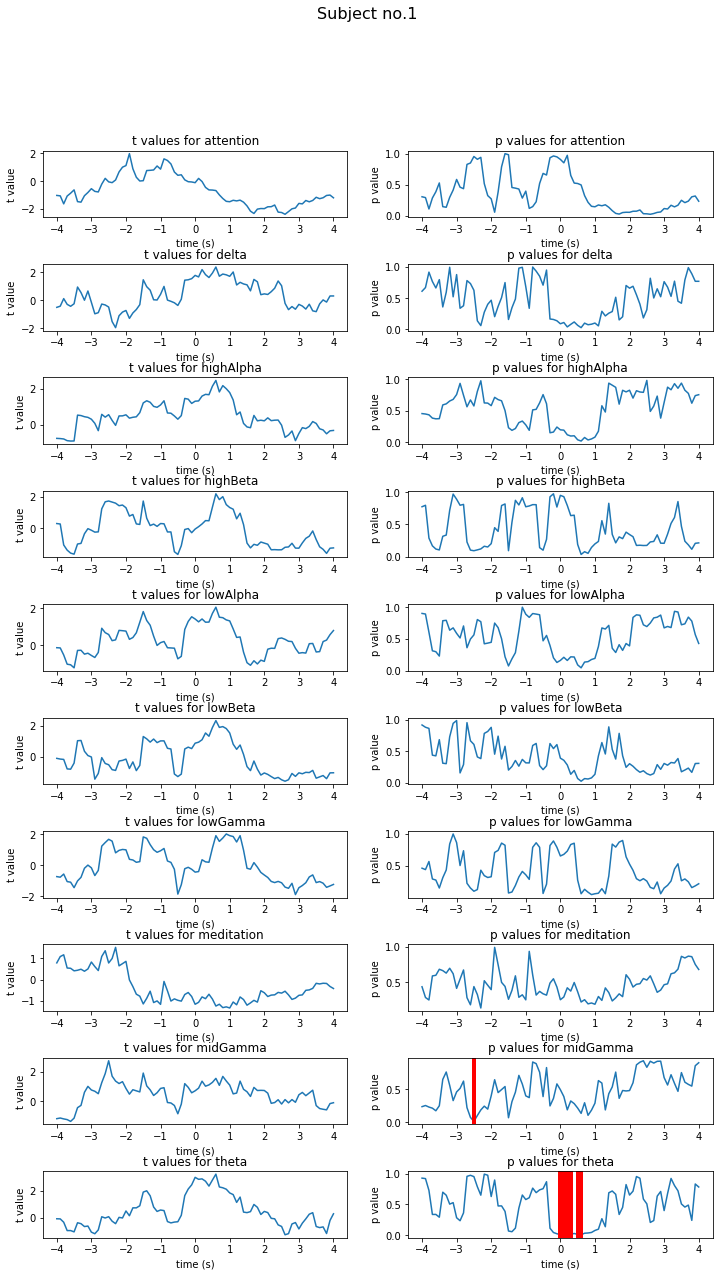

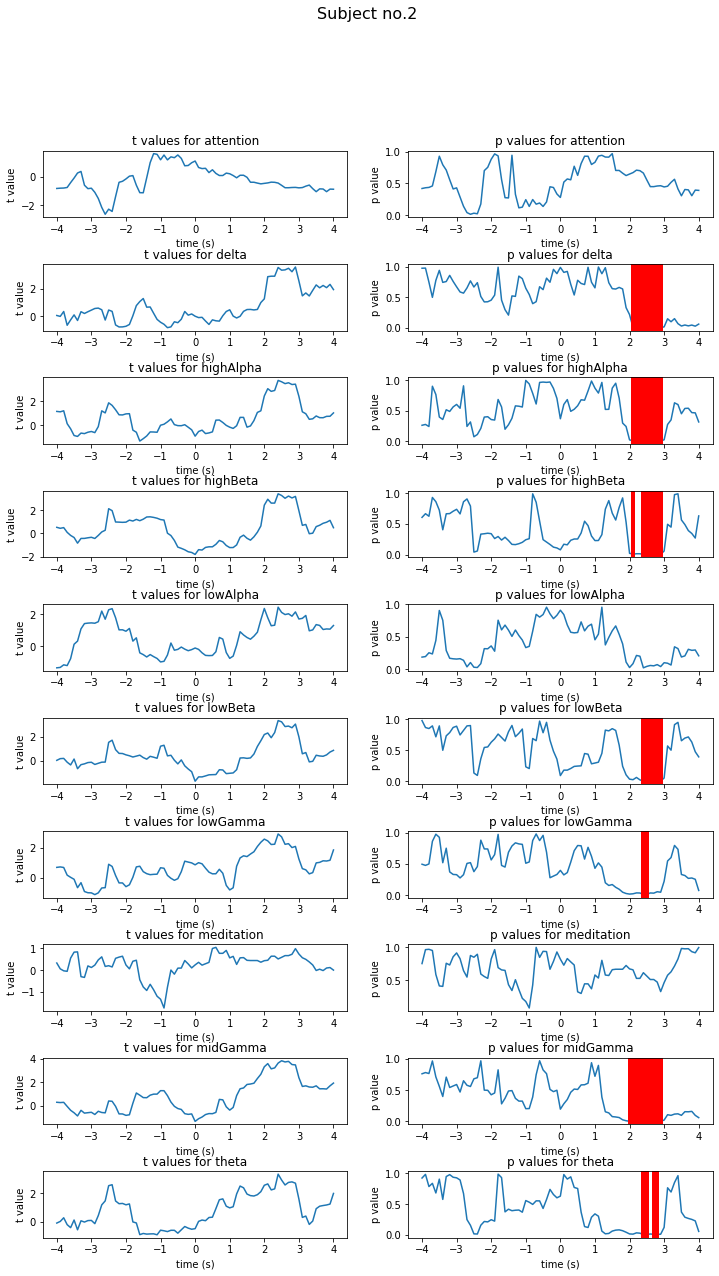

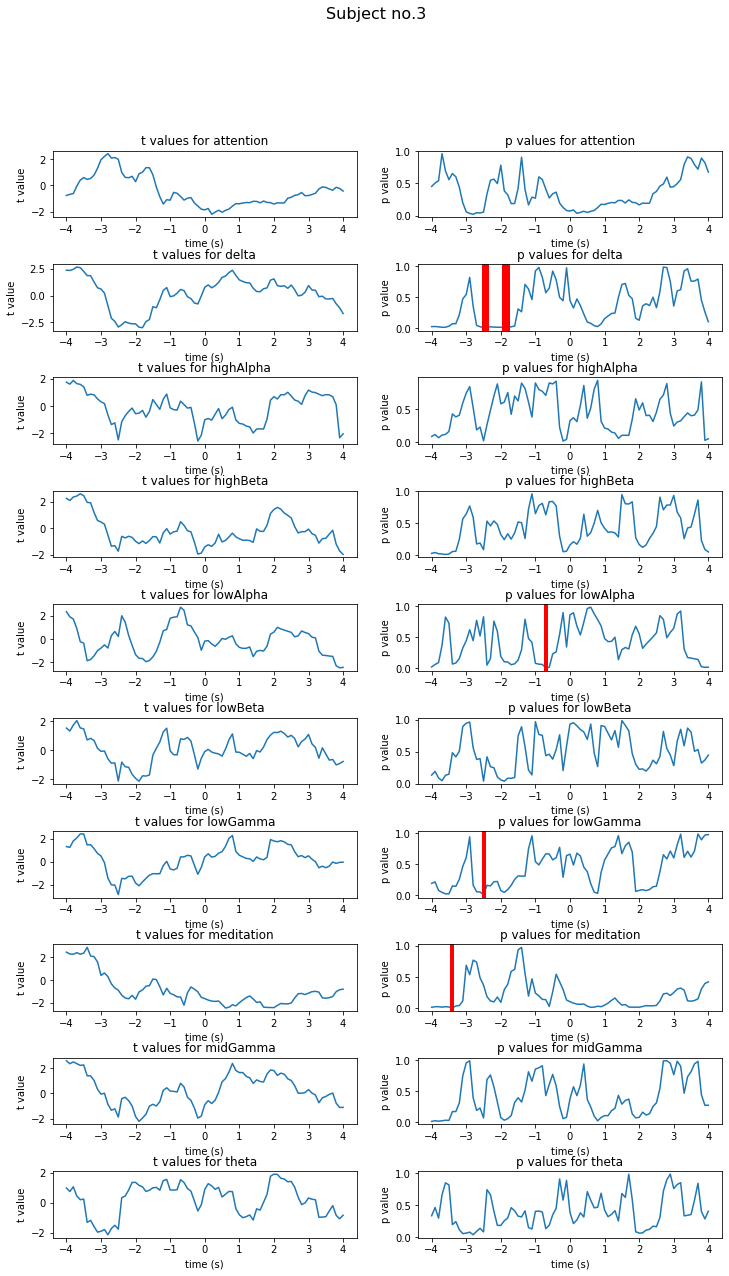

In [3]:
epochs = [create_epochs(recording) for recording in recordings[1:]]
epochs = [mne.concatenate_epochs(epochs[:3]), epochs[3], epochs[4]]
for ind, epoch in enumerate(epochs):
    plot_tp(epoch, alpha = 0.01, sub_no = ind+1
            ,tmin=tmin, tmax=tmax)
    plt.savefig(f'./subject{ind}.png')